# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (28)

# `ALEJANDRO SÁNCHEZ MONZÓN`

**15/04/2024**

## Aplicar un caso de uso (*Time Series Forecasting*)

In [124]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [125]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

En esta sesión intentaremos predecir las **[ventas mensuales de corticosteroides en Australia](https://pkg.robjhyndman.com/fpp2-package/reference/h02.html#format:~:text=Monthly%20corticosteroid%20drug%20subsidy%20in%20Australia%20from%201991%20to%202008.)**. Estos medicamentos se conocen como **fármacos H02** según el esquema de clasificación Anatómico Terapéutico Químico (_ATC_) y se utilizan principalmente por sus efectos **anti-inflamatorios** e inmunosupresores. Por ejemplo __Dexametasona__ y __Betametasona__ son algunos ejemplos de medicamentos de la clase H02.

Dascargamos la serie temporal con las ventas mensuales en **millones de dólares** en fármacos **H02** que se han recetado en el **sistema de salud Australiano** entre los años de **1991 y 2008**.

In [126]:
df = pd.read_csv('dataset_h02.csv')
df

,fecha,venta_h02
0,1992-04-01,0.379808
1,1992-05-01,0.361801
2,1992-06-01,0.410534
3,1992-07-01,0.483389
4,1992-08-01,0.475463
...,...,...
190,2008-02-01,0.761822
191,2008-03-01,0.649435
192,2008-04-01,0.827887
193,2008-05-01,0.816255


In [127]:
# Definir un rango de fechas con pasos fijos
fechas = pd.date_range(start=df['fecha'].values[0], end=df['fecha'].values[-1], freq='MS')

# Asignar a las fechas como los índices del DataFrame
df.set_index(fechas, inplace=True)

# Quitar la columna 'fecha' de la tabla
df.drop(columns='fecha', inplace=True)

df

,venta_h02
1992-04-01,0.379808
1992-05-01,0.361801
1992-06-01,0.410534
1992-07-01,0.483389
1992-08-01,0.475463
...,...
2008-02-01,0.761822
2008-03-01,0.649435
2008-04-01,0.827887
2008-05-01,0.816255


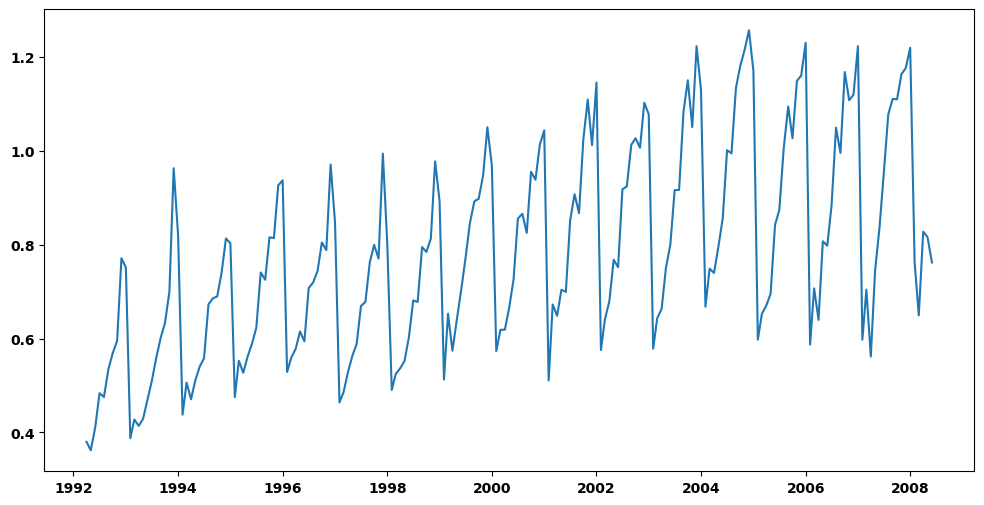

In [128]:
# Visualizamos los datos preparados
plt.plot(df)
plt.show()

In [129]:
# Las gráficas interactivas ayudan bastante a los analistas de datos, sobre todo a la hora de analizar y explorar las series temporales
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['venta_h02'],
    mode="markers+lines"
    ))

fig.update_layout(title="Ventas mensuales de corticosteroides (H02) en Australia",
                  title_font_size=26,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Millones de dólares (A$)'
                  )

fig.show()

---

### **`Ejercicio 28.1`**

**`28.1.1`** Aplica una descomposición de la serie temporal mediante el método `STL` y visualiza los componentes correspondientes. Describe la tendencia y la estacionalidad si son presentes en la serie temporal.

**`28.1.2`** Saca la gráfica de ***correlograma*** para la serie temporal, considerando hasta el retraso indicado y analiza los patrones que ves presente en esta gráfica: 

 - `lags=60`

**`28.1.3`** Saca la gráfica de ***Autocorrelación parcial*** para la serie temporal, considerando el método con los retrasos indicados y analiza los patrones que ves presente en esta gráfica: 

 - `lags=48`
 - `method='ywm'`

**`28.1.4`** Saca la gráfica de las ***Características estadísticas*** y su evolución a lo largo de tiempo de **la serie temporal**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos: 

 - `win = 12`

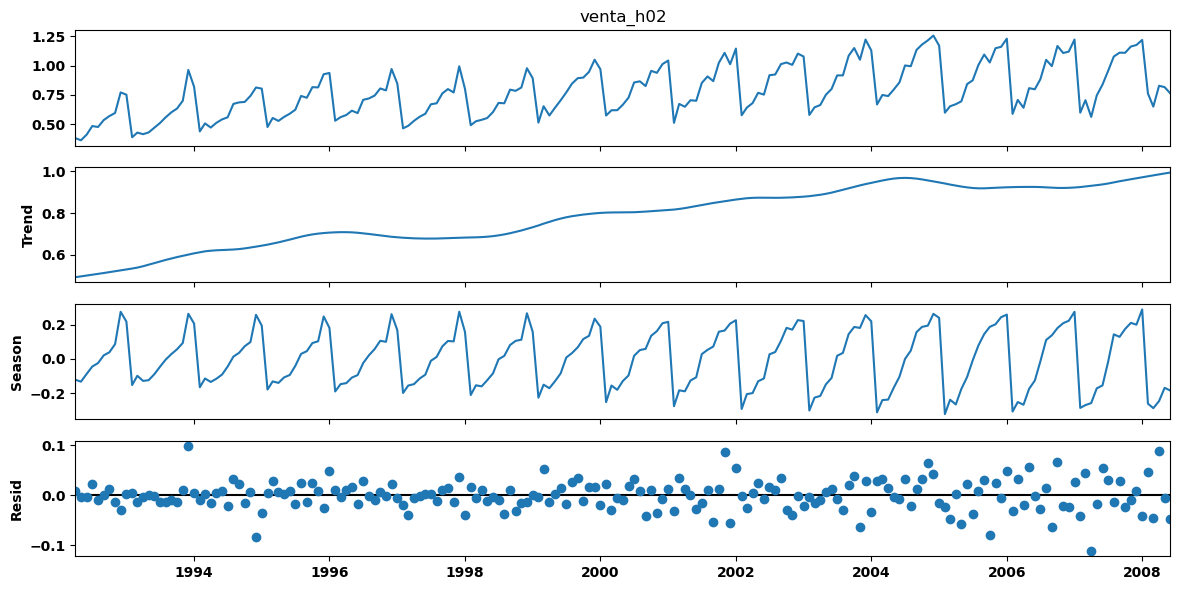

In [130]:
## Solución 28.1.1
from statsmodels.tsa.seasonal import STL

df_stl = STL(df['venta_h02']).fit()

df_stl.plot()
plt.show()

#### Explicación 28.1.1
>

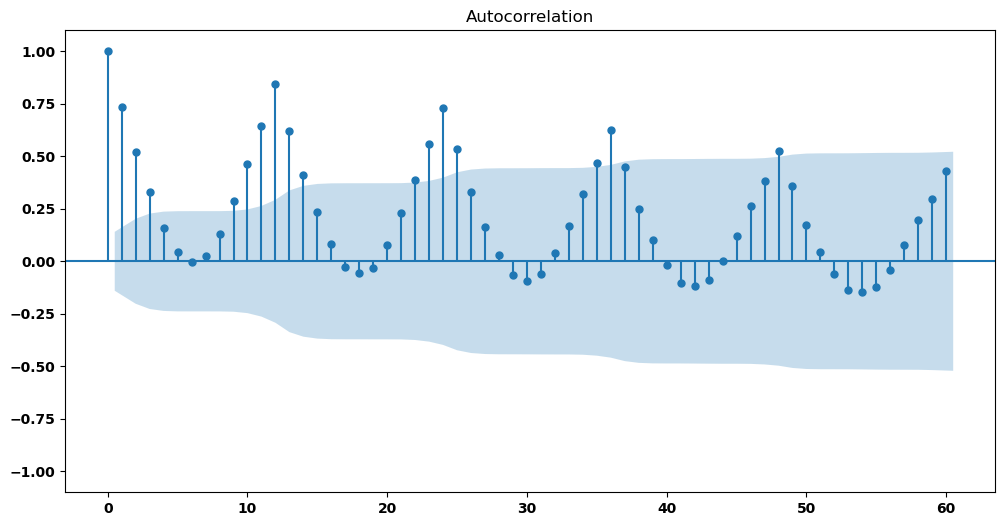

In [131]:
## Solución 28.1.2
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df, lags=60)
plt.ylim(-1.1,1.1)
plt.show()

#### Explicación 28.1.2
>

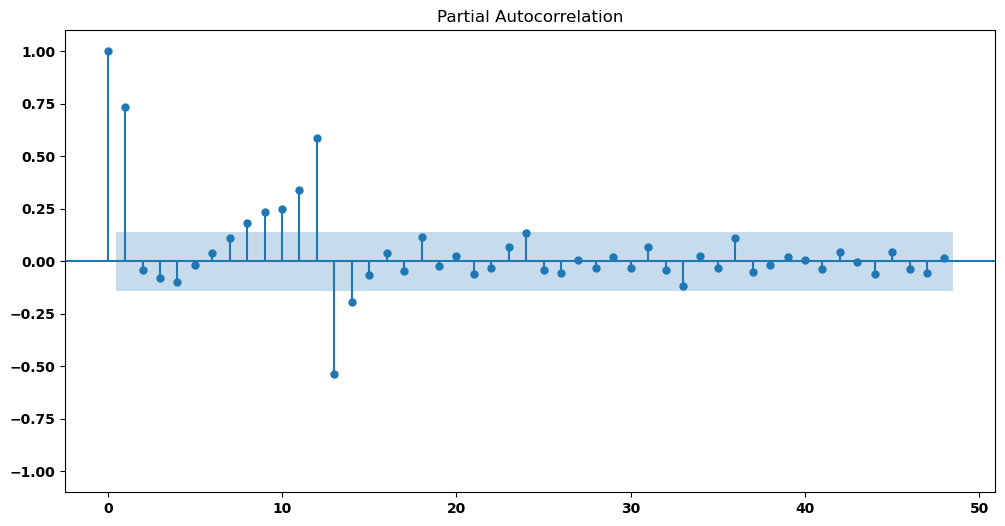

In [132]:
## Solución 28.1.3
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df, lags=48, method='ywm')
plt.ylim(-1.1,1.1)
plt.show()

#### Explicación 28.1.3
>

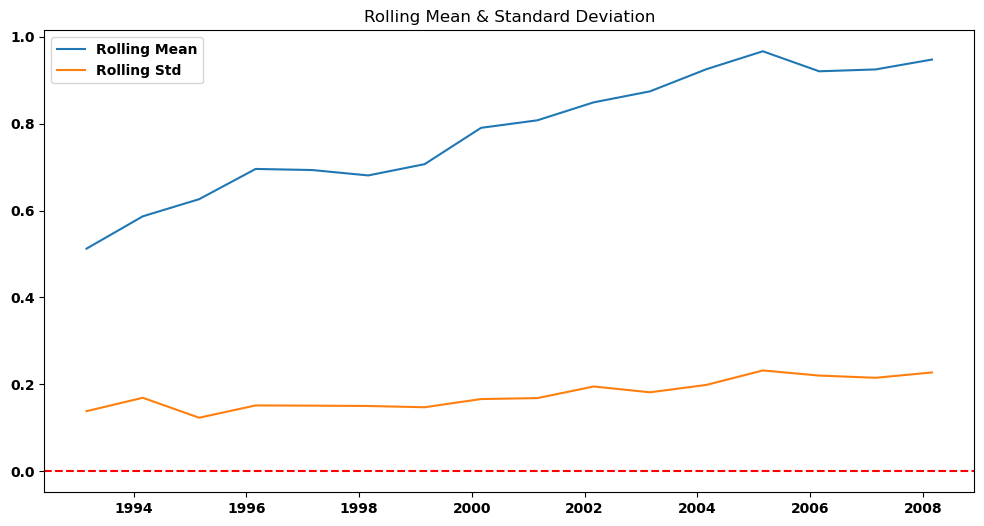

In [133]:
## Solución 28.1.4
win = 12
rolmean = df['venta_h02'].rolling(win).mean().iloc[win-1::win]
rolstd = df['venta_h02'].rolling(win).std().iloc[win-1::win]

plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label = 'Rolling Std')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

#### Explicación 28.1.4
>

---

### **`Ejercicio 28.2`**

Vamos a intentar a modelar la serie temporal con el objetivo de **predecir los valores mensuales del último año**. 

**`28.2.1`** Aplica el método de `Seasonal Naïve` a la serie temporal y consigue estos puntos **y analiza los resultados obtenidos**:
- Grafica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`28.2.2`** Aplica el método estadístico de `Autoregresión - AR` considerando el valor del parámetro _`p`_ según el último retraso con un valor significativo en la ***correlograma*** de la serie temporal. Después consigue estos puntos **y analiza los resultados obtenidos**:
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráficas de análisis del componente residual (curvas de diagnóstico, correlaciones con otras variables)
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica interactiva con el histórico, la predicción de este modelo con **sus intervalos de confianza** y los valores reales del último año. 
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`28.2.3`** Aplica el modelo de `SARIMA` para la serie temporal, utilizando el método de **`auto_arima`** según la búsqueda indicada considerando la estacionalidad de la serie. Después consigue estos puntos **y analiza los resultados obtenidos**:
- `start_p=1`
- `start_q=0`
- `start_P=1`
- `random_state=120`
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.


In [134]:
df_test = df.tail(12)
df_train = df.loc[df.index.isin(df_test.index)==False]

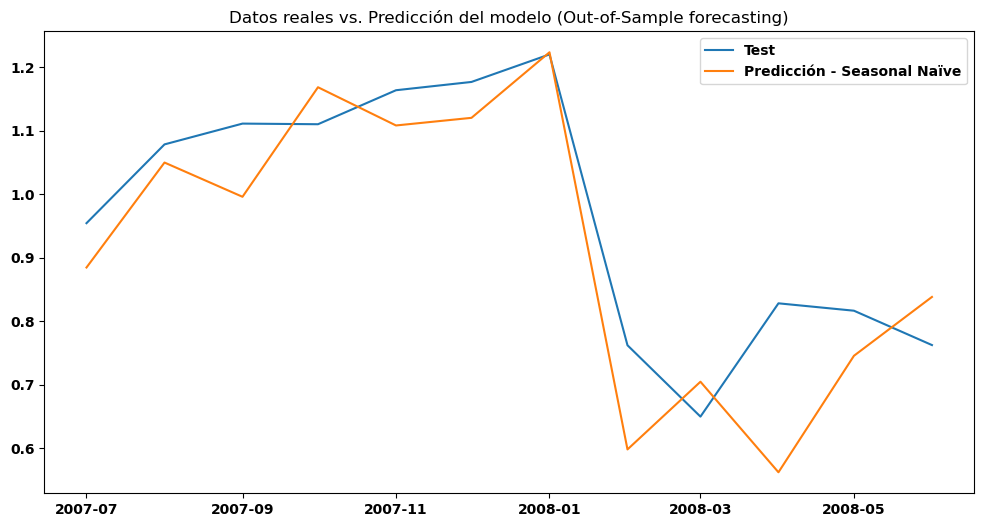

In [135]:
## Solución 28.2.1
pred = pd.DataFrame(data=df_train.tail(12).values, index=df_test.index, columns=['pred'])

plt.plot(df_test, label='Test')
plt.plot(pred, label='Predicción - Seasonal Naïve')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [136]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Out-of-sample performance:  Seasonal Naive")
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test, pred)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred)))
print('R^2 coefficient of determination:', r2_score(df_test, pred))

Out-of-sample performance:  Seasonal Naive
Mean Absolute Error (MAE): 0.08494277166666668
Mean Absolute Percentage Error (MAPE): 9.686181826381263
Mean Squared Error (MSE): 0.011684411050918485
Root Mean Squared Error (RMSE): 0.10809445430232989
R^2 coefficient of determination: 0.6717644471769628


#### Explicación 28.2.1
>

In [137]:
## Solución 28.2.2
from statsmodels.tsa.ar_model import AutoReg

modelo_ar = AutoReg(df_train, lags=48)
modelo_ar

In [138]:
fit_ar = modelo_ar.fit()

fit_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              venta_h02   No. Observations:                  183
Model:                    AutoReg(48)   Log Likelihood                 246.028
Method:               Conditional MLE   S.D. of innovations              0.039
Date:                Tue, 16 Apr 2024   AIC                           -392.057
Time:                        17:45:14   BIC                           -246.793
Sample:                    04-01-1996   HQIC                          -333.026
                         - 06-01-2007                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0506      0.030      1.710      0.087      -0.007       0.109
venta_h02.L1     -0.0349      0.086     -0.403      0.687      -0.204       0.135
venta_h02.L2      0.4420      0.087      5.101      0.000       0.272       0.612
venta_h02.L3      0.4070      0.095      4.291      0.000       0.221       0.593
venta_h02.L4     -0.0464      0.101     -0.460      0.645      -0.244       0.151
venta_h02.L5     -0.0189      0.102     -0.186      0.853      -0.218       0.180
venta_h02.L6     -0.0014      0.101     -0.014      0.989      -0.200       0.197
venta_h02.L7      0.0753      0.101      0.745      0.456      -0.123       0.273
venta_h02.L8      0.0044      0.100      0.044      0.965      -0.192       0.201
venta_h02.L9      0.0547      0.100      0.544      0.586      -0.142       0.251
venta_h02.L10    -0.0785      0.099     -0.790      0.430      -0.273       0.116
venta_h02.L11    -0.1979      0.094     -2.099      0.036      -0.383      -0.013
venta_h02.L12     0.5287      0.096      5.498      0.000       0.340       0.717
venta_h02.L13     0.1445      0.102      1.423      0.155      -0.055       0.344
venta_h02.L14    -0.1845      0.103     -1.793      0.073      -0.386       0.017
venta_h02.L15    -0.2978      0.101     -2.938      0.003      -0.497      -0.099
venta_h02.L16     0.0130      0.100      0.130      0.896      -0.183       0.209
venta_h02.L17     0.0425      0.100      0.425      0.671      -0.154       0.239
venta_h02.L18     0.0159      0.102      0.157      0.876      -0.183       0.215
venta_h02.L19    -0.1526      0.102     -1.500      0.134      -0.352       0.047
venta_h02.L20    -0.1827      0.102     -1.790      0.073      -0.383       0.017
venta_h02.L21     0.0314      0.106      0.297      0.766      -0.176       0.238
venta_h02.L22     0.0621      0.106      0.586      0.558      -0.145       0.270
venta_h02.L23     0.3064      0.104      2.955      0.003       0.103       0.510
venta_h02.L24     0.0642      0.107      0.597      0.550      -0.146       0.275
venta_h02.L25    -0.1334      0.108     -1.236      0.217      -0.345       0.078
venta_h02.L26     0.1014      0.106      0.952      0.341      -0.107       0.310
venta_h02.L27     0.1550      0.106      1.459      0.145      -0.053       0.363
venta_h02.L28    -0.0563      0.100     -0.566      0.571      -0.251       0.139
venta_h02.L29    -0.2022      0.099     -2.037      0.042      -0.397      -0.008
venta_h02.L30    -0.1102      0.099     -1.116      0.265      -0.304       0.083
venta_h02.L31     0.0337      0.098      0.344      0.731      -0.159       0.226
venta_h02.L32     0.1788      0.100      1.787      0.074      -0.017       0.375
venta_h02.L33    -0.2030      0.101     -2.005      0.045      -0.402      -0.005
venta_h02.L34    -0.0346      0.103     -0.338      0.736      -0.236       0.166
venta_h02.L35     0.0658      0.100      0.655      0.512      -0.131       0.263
venta_h02.L36     0.3031      0.101      3.

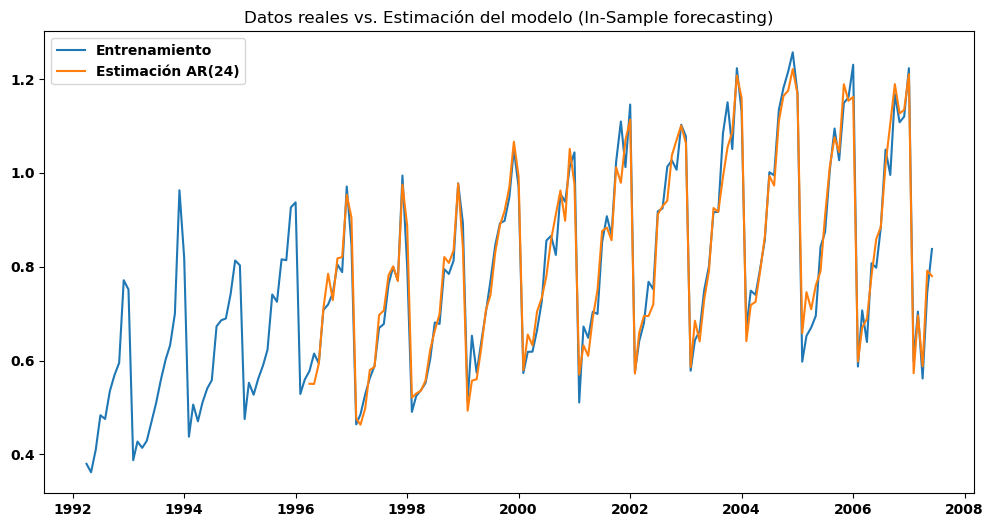

In [139]:
estim_ar = fit_ar.fittedvalues

plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_ar, label='Estimación AR(24)')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

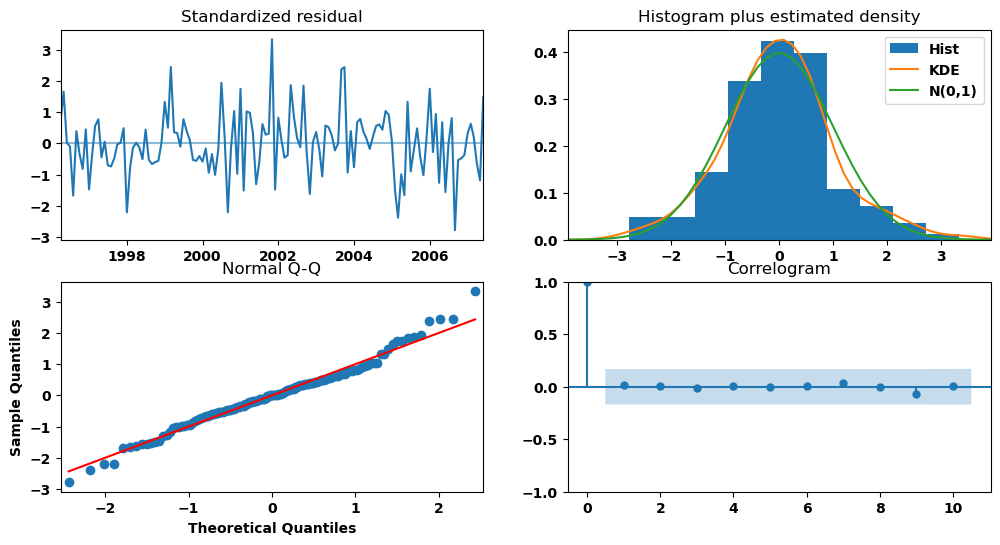

In [140]:
fit_ar.plot_diagnostics()
plt.show()

In [141]:
fit_ar.predict(start=df_test.index[0],
               end=df_test.index[-1])

2007-07-01    0.896650
2007-08-01    1.043430
2007-09-01    1.014030
2007-10-01    1.216538
2007-11-01    1.165268
2007-12-01    1.197656
2008-01-01    1.163550
2008-02-01    0.619112
2008-03-01    0.716028
2008-04-01    0.676230
2008-05-01    0.827267
2008-06-01    0.867919
Freq: MS, dtype: float64

In [142]:
pred_ar = fit_ar.forecast(steps=12)

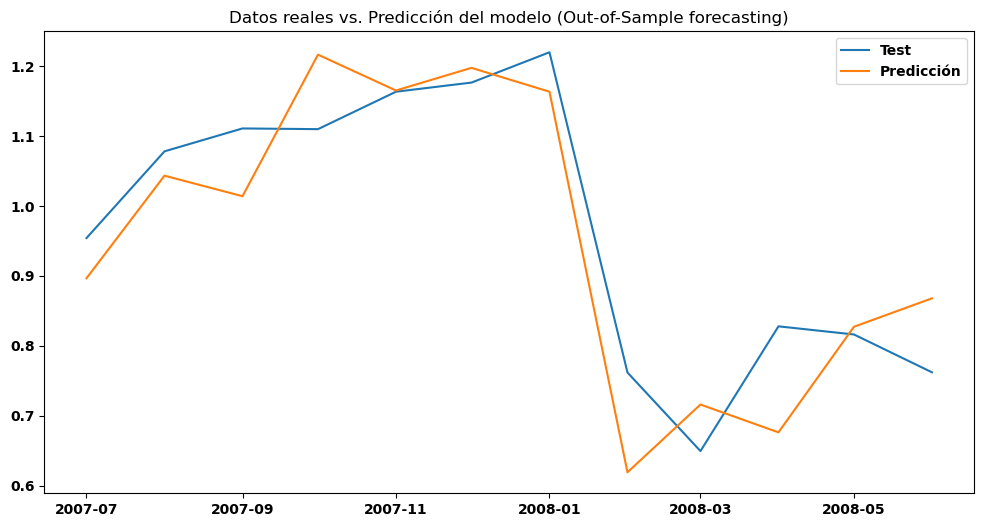

In [143]:
plt.plot(df_test, label='Test')
plt.plot(pred_ar, label='Predicción')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [144]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train.index,
    y=df_train['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_ar.index,
    y=pred_ar,
    name="Predicción (AutoReg)",
    mode="markers+lines"
    ))

fig.update_layout(title="Ventas mensuales de corticosteroides (H02) en Australia",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Ventas (Millones de dólares)'
                  )

fig.show()

In [145]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_ar))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test, pred_ar)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_ar))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_ar)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_ar))

Mean Absolute Error (MAE): 0.07106164003800586
Mean Absolute Percentage Error (MAPE): 8.05624646487446
Mean Squared Error (MSE): 0.007334059579440837
Root Mean Squared Error (RMSE): 0.08563912411649734
R^2 coefficient of determination: 0.7939734326356465


#### Explicación 28.2.2
>

In [146]:
## Solución 28.2.3
from pmdarima.arima import auto_arima

fit_sarima_auto = auto_arima(df_train,
                         start_p=1,
                         start_q=0,
                         start_P=1,
                         m=12,
                         seasonal=True,
                         n_jobs=-1,
                         random_state=120)

c:\Users\aleja\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning:

stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.



In [147]:
fit_sarima_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  183
Model:             SARIMAX(4, 0, 0)x(2, 1, [1], 12)   Log Likelihood                 272.361
Date:                              Tue, 16 Apr 2024   AIC                           -526.721
Time:                                      17:46:39   BIC                           -498.446
Sample:                                  04-01-1992   HQIC                          -515.248
                                       - 06-01-2007                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0103      0.005      2.233      0.026       0.001       0.019
ar.L1          0.1954      0.075      2.620      0.009       0.049       0.342
ar.L2          0.4022      0.077      5.196      0.000       0.251       0.554
ar.L3          0.2623      0.076      3.440      0.001       0.113       0.412
ar.L4         -0.1468      0.079     -1.862      0.063      -0.301       0.008
ar.S.L12      -0.0085      0.222     -0.038      0.970      -0.445       0.428
ar.S.L24      -0.2524      0.131     -1.932      0.053      -0.509       0.004
ma.S.L12      -0.4199      0.229     -1.835      0.067      -0.868       0.029
sigma2         0.0023      0.000     10.083      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.88
Prob(Q):                              0.88   Prob(JB):                         0.09
Heteroskedasticity (H):               1.83   Skew:                            -0.26
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
fit_sarima_auto.predict_in_sample()

1992-04-01    0.028576
1992-05-01    0.028576
1992-06-01    0.028576
1992-07-01    0.028576
1992-08-01    0.028576
                ...   
2007-02-01    0.600236
2007-03-01    0.729562
2007-04-01    0.700974
2007-05-01    0.780902
2007-06-01    0.773663
Freq: MS, Name: predicted_mean, Length: 183, dtype: float64

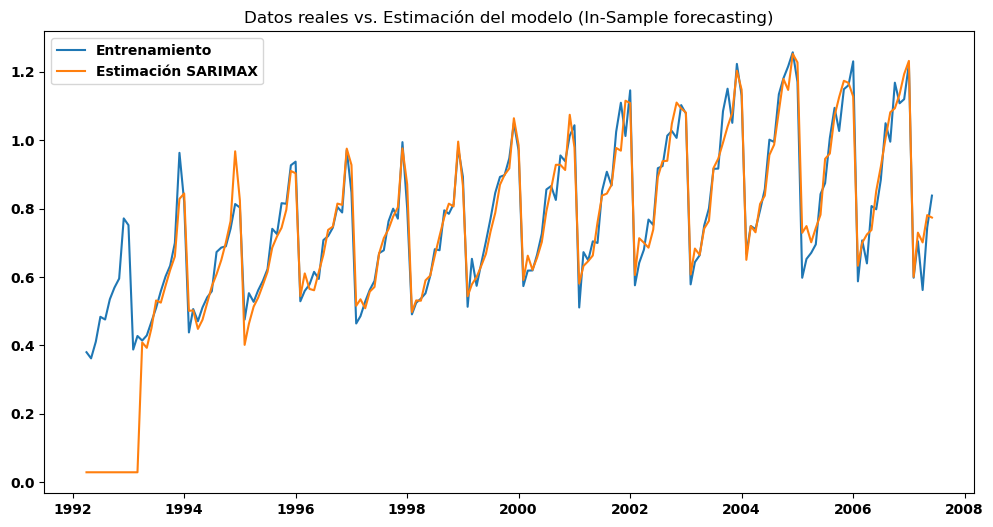

In [149]:
estim_sarima_auto = fit_sarima_auto.predict_in_sample()

plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_sarima_auto, label='Estimación SARIMAX')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

In [150]:
pred_sarima_auto = fit_sarima_auto.predict(12)
pred_sarima_auto

2007-07-01    0.893779
2007-08-01    1.039622
2007-09-01    1.064716
2007-10-01    1.182288
2007-11-01    1.167109
2007-12-01    1.200904
2008-01-01    1.235305
2008-02-01    0.654014
2008-03-01    0.741558
2008-04-01    0.669396
2008-05-01    0.792724
2008-06-01    0.892184
Freq: MS, dtype: float64

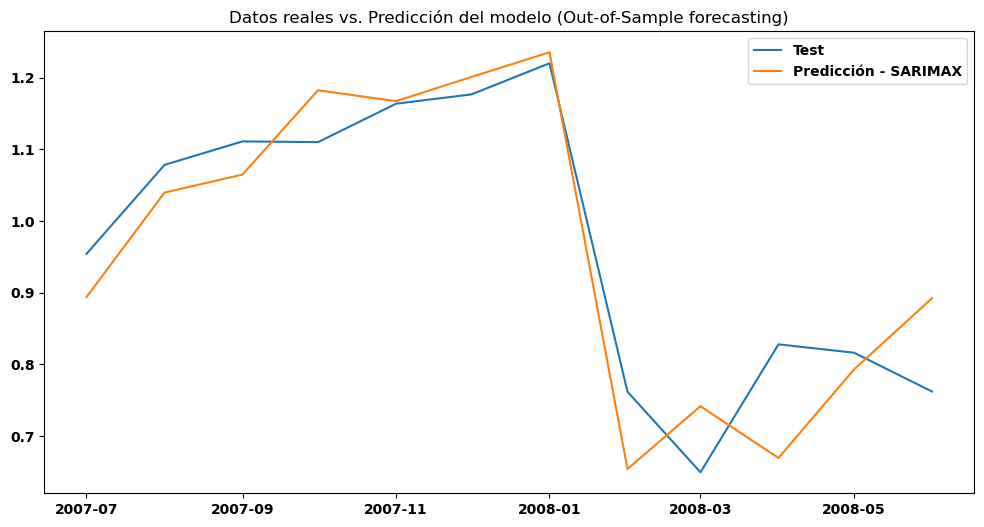

In [151]:
plt.plot(df_test, label='Test')
plt.plot(pred_sarima_auto, label='Predicción - SARIMAX')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [152]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_sarima_auto))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test, pred_sarima_auto)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_sarima_auto))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_sarima_auto)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_sarima_auto))

Mean Absolute Error (MAE): 0.06439933871953064
Mean Absolute Percentage Error (MAPE): 7.63710590143964
Mean Squared Error (MSE): 0.006336461857296698
Root Mean Squared Error (RMSE): 0.07960189606596502
R^2 coefficient of determination: 0.8219976983342796


#### Explicación 28.2.3
>

---

### **`Ejercicio 28.3`**

**`28.3.1`** Construye un modelo de regresión con el método ___`CatBoostRegressor`___ (con sus hiperparámetros por defecto). Al igual que el modelo _AR_ (punto `28.2.2`) introduce el valor del parámetro _`p`_ según el último retraso con un valor significativo en la ***correlograma*** de la serie temporal. Posteriormente, calcula las métricas de calidad del modelo **y analiza los resultados obtenidos**:  
- `random_state=77`
- `silent=True`
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`28.3.2`** Realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de retrasos, teniendo en cuenta los siguientes puntos:

- Hasta el último retraso estimado en el modelo anterior inclusive (_`p`_)
- Modelo: **CatBoostRegressor**
- `random_state=77`
- `silent=True`

**`28.3.3`** Teniendo en cuenta el valor óptimo calculado en el paso anterior para los retrasos, realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de **árboles**.
- inicio: **5** árboles
- fin: **200** árboles inclusive
- con pasos **de 5 en 5**

**`28.3.4`** Teniendo en cuenta los valores óptimos calculados en los pasos anteriores, realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de la **profundidad máxima**.
- Desde **2** hasta **10** no inclusive

**`28.3.5`** Construye un modelo con los hiperparámetros óptimos que hayas calculado en los puntos anteriores y calcula las métricas de calidad del modelo y de sus predicciones:

  - `random_state=77`
  - `silent=True`
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`28.3.6`** Saca la gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_" y **analiza y compara los resultados** de este modelo con los modelos anteriores.

**`28.3.7`** Realiza un análisis tipo `In-Sample Model Evaluation` para evaluar la calidad del modelo ajustado mediante siguientes puntos **y explica los resultados obtenidos**:  

- Calcula las estimaciones del modelo ajustado (_`fitted values`_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_" para el periodo de entrenamiento
- Gráfica diagonal de "_Valores reales vs. valors estimados (In-Sample forecasting)_"
- Gráfica de "_Componente residual del modelo (In-Sample fitted errores)_"
- Gráficas de "_Histograma del componente residual (In-sample errors)_"
- Gráfica de la ***Desviación estándar*** y su evolución a lo largo de tiempo para **el componente residual**, considerando una ventana con el tamaño indicado:

   - `win = 12`
- El **correlograma** y la gráfica de **autocorrelación parcial** para **el componente residual** considerando el método con los retrasos indicados:

 - `lags=37`
 - `method='ywm'`
- Gráficas de posibles correlaciones entre **el componente residual** y **los valores relaes y estimados**

**`28.3.8`** Saca la gráfica **interactiva** con el histórico, las predicciones de los modelos desarrollados y los valores reales del último año:

- Predicción del modelo **AR** (`28.2.2`)
- Predicción del modelo **SARIMA** (`28.2.3`)
- Predicción del modelo **CatBoostRegressor** (`28.3.5`)

**`28.3.9`** Explica **cuál sería el mejor modelo que elegirías** para esta caso de uso. Además, describe **¿qué tipo de uso podría tener este ejercicio predictivo?** en tu opinión y que sobre todo **para qué fin podría servir las prediciones de estas ventas mensuales.**

In [153]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [154]:
## Solución 28.3.1
from catboost import CatBoostRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

modelo_cat = ForecasterAutoreg(
                regressor = CatBoostRegressor(random_state=77, silent=True),
                lags = 48
                )

In [155]:
modelo_cat.fit(y=df_train['venta_h02'])
pred_cat = modelo_cat.predict(steps=12)

In [156]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_cat))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_cat)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_cat))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_cat)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_cat))

Mean Absolute Error (MAE): 0.0696226114195722
Mean Absolute Percentage Error: 7.838613721636127
Mean Squared Error (MSE): 0.006350856380136979
Root Mean Squared Error (RMSE): 0.07969226047827342
R^2 coefficient of determination: 0.8215933309989031


#### Explicación 28.3.1
>

El mejor valor de retrasos podría ser = 34  que consigue un R2 = 0.8564726331942636


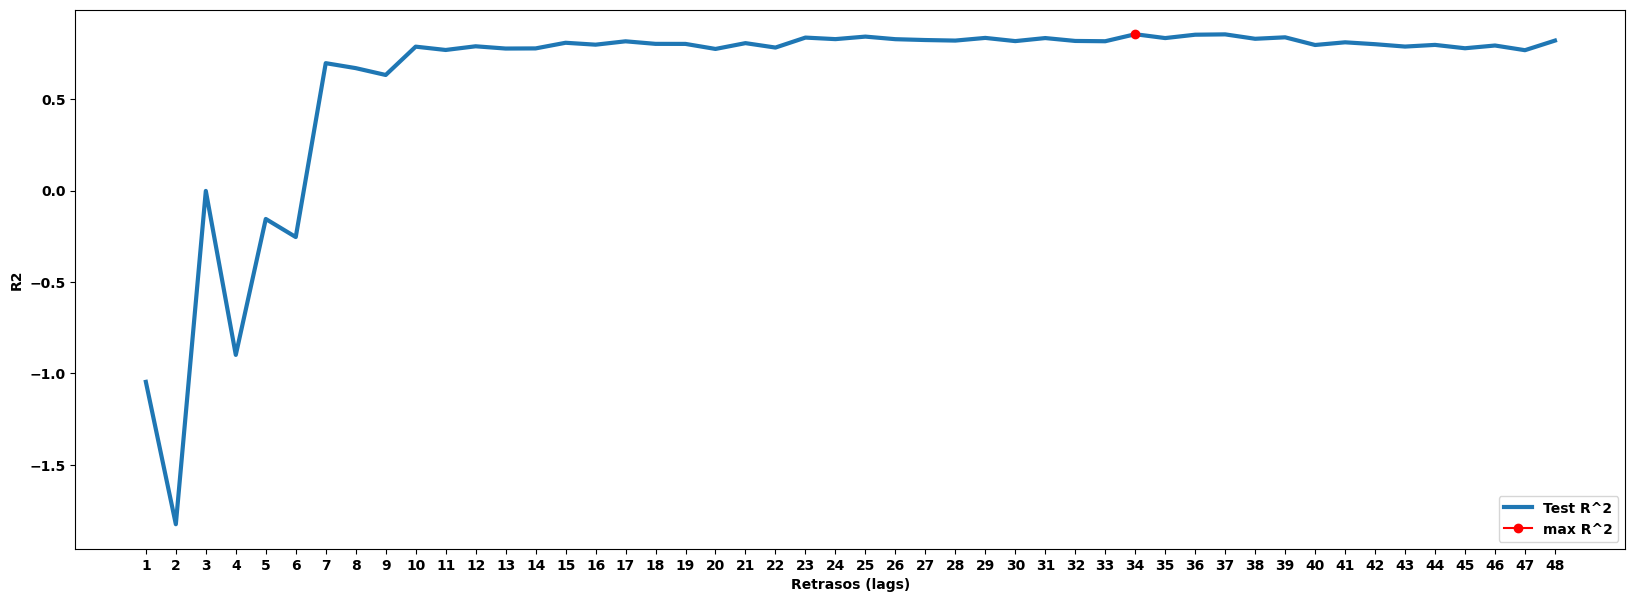

In [157]:
## Solución 28.3.2
hiper_param_28_3_2 = np.arange(1, 49).tolist()

test_r2_28_3_2 = np.zeros(len(hiper_param_28_3_2))

for i in range(len(hiper_param_28_3_2)):
    modelo_cat_28_3_2 = ForecasterAutoreg(
                    regressor = CatBoostRegressor(random_state=77, silent=True),
                    lags = hiper_param_28_3_2[i]
                )

    modelo_cat_28_3_2.fit(y=df_train['venta_h02'])
    test_r2_28_3_2[i] = r2_score(df_test, modelo_cat_28_3_2.predict(steps=12))

print("El mejor valor de retrasos podría ser =", hiper_param_28_3_2[np.argmax(test_r2_28_3_2)],
      " que consigue un R2 =", max(test_r2_28_3_2))

fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param_28_3_2, test_r2_28_3_2, linewidth=3, label='Test R^2')
plt.plot(hiper_param_28_3_2[np.argmax(test_r2_28_3_2)], max(test_r2_28_3_2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param_28_3_2)
plt.xlabel('Retrasos (lags)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()


El mejor valor de número de arboles podría ser = 100  que consigue un R2 = 0.8824119211239088


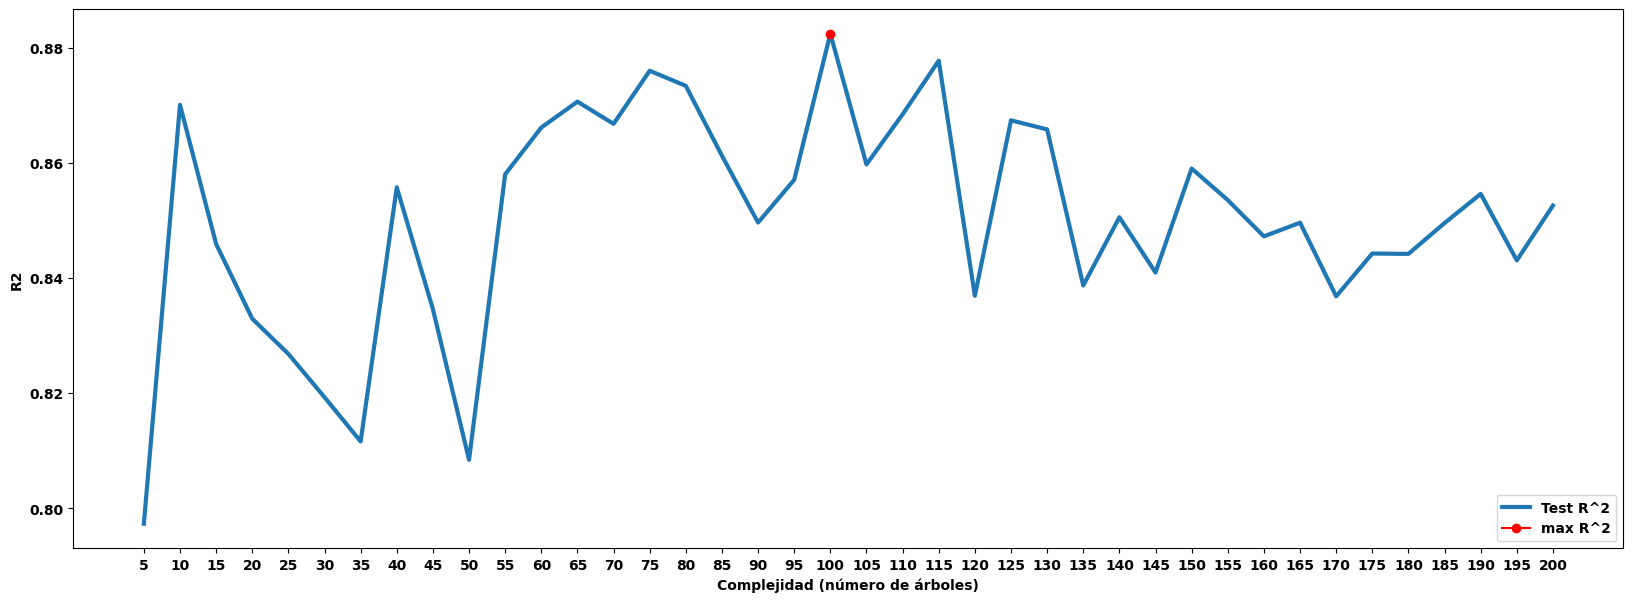

In [158]:
## Solución 28.3.3
hiper_param_28_3_3 = np.arange(5, 201, 5)

test_r2_28_3_3 = np.zeros(hiper_param_28_3_3.size)

lags_28_3 = hiper_param_28_3_2[np.argmax(test_r2_28_3_2)]

for i in range(hiper_param_28_3_3.size):
    modelo_cat_28_3_3 = ForecasterAutoreg(
                    regressor = CatBoostRegressor(
                        n_estimators=hiper_param_28_3_3[i],
                        random_state=77,
                        silent=True
                        ),
                    lags = lags_28_3
                )

    modelo_cat_28_3_3.fit(y=df_train['venta_h02'])
    test_r2_28_3_3[i] = r2_score(df_test, modelo_cat_28_3_3.predict(steps=12))

print("El mejor valor de número de arboles podría ser =", hiper_param_28_3_3[np.argmax(test_r2_28_3_3)],
      " que consigue un R2 =", max(test_r2_28_3_3))

fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param_28_3_3, test_r2_28_3_3, linewidth=3, label='Test R^2')
plt.plot(hiper_param_28_3_3[np.argmax(test_r2_28_3_3)], max(test_r2_28_3_3),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param_28_3_3)
plt.xlabel('Complejidad (número de árboles)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()


El mejor valor de profundidad podría ser = 6  que consigue un R2 = 0.8824119211239088


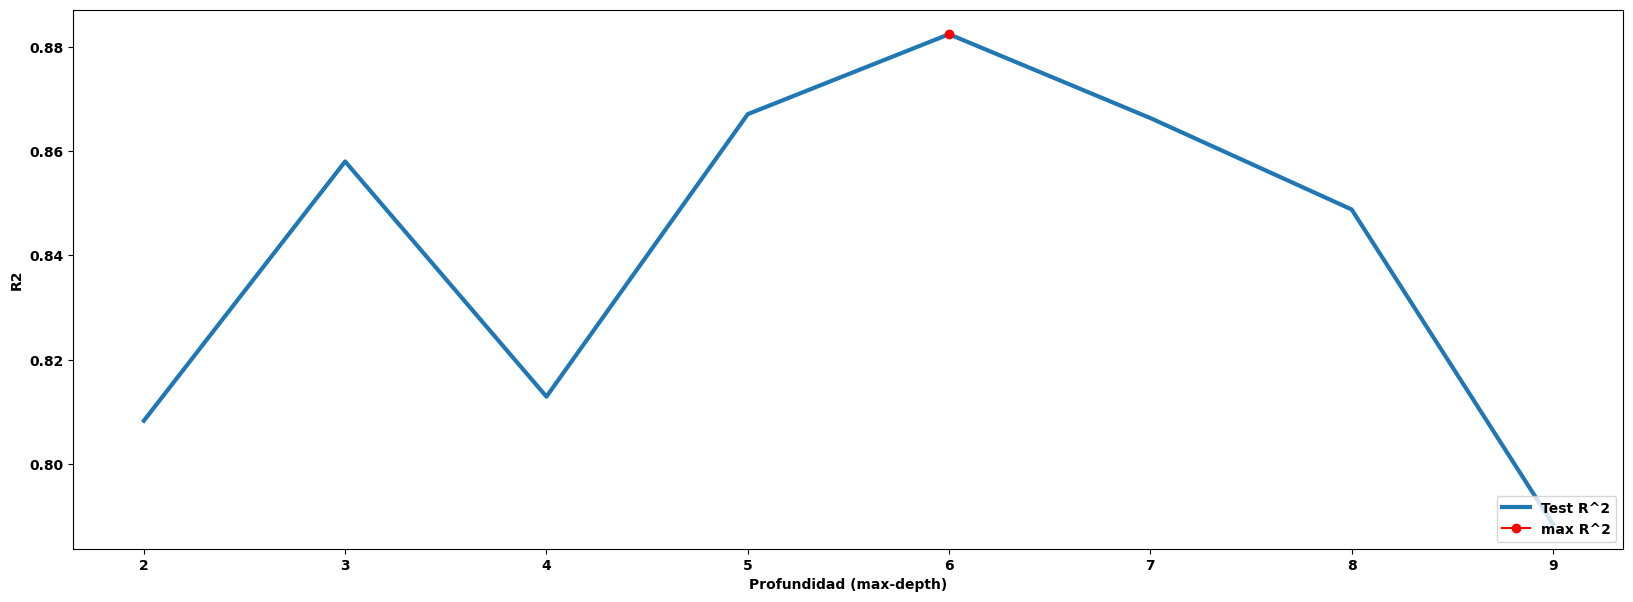

In [159]:
## Solución 2.3.4
hiper_param_28_3_4 = np.arange(2, 10)

test_r2_28_3_4 = np.zeros(hiper_param_28_3_4.size)

n_estimators_28_3 = hiper_param_28_3_3[np.argmax(test_r2_28_3_3)]

for i in range(hiper_param_28_3_4.size):
    modelo_cat_28_3_4 = ForecasterAutoreg(
                    regressor = CatBoostRegressor(
                        random_state=77,
                        silent=True,
                        n_estimators=n_estimators_28_3,
                        max_depth=hiper_param_28_3_4[i]),
                    lags = lags_28_3
                )

    modelo_cat_28_3_4.fit(y=df_train['venta_h02'])
    test_r2_28_3_4[i] = r2_score(df_test, modelo_cat_28_3_4.predict(steps=12))

print("El mejor valor de profundidad podría ser =", hiper_param_28_3_4[np.argmax(test_r2_28_3_4)],
      " que consigue un R2 =", max(test_r2_28_3_4))

fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param_28_3_4, test_r2_28_3_4, linewidth=3, label='Test R^2')
plt.plot(hiper_param_28_3_4[np.argmax(test_r2_28_3_4)], max(test_r2_28_3_4),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param_28_3_4)
plt.xlabel('Profundidad (max-depth)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()


In [160]:
## Solución 28.3.5
max_depth_28_3 = hiper_param_28_3_4[np.argmax(test_r2_28_3_4)]

modelo_28_3_5 = ForecasterAutoreg(
    regressor = CatBoostRegressor(max_depth=max_depth_28_3, n_estimators=n_estimators_28_3, random_state=77, silent=True),
    lags = lags_28_3
)

modelo_28_3_5.fit(y=df_train['venta_h02'])

y_pred_28_3_5 = modelo_28_3_5.predict(steps=12)

In [161]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, y_pred_28_3_5))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, y_pred_28_3_5)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, y_pred_28_3_5))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, y_pred_28_3_5)))
print('R^2 coefficient of determination:', r2_score(df_test, y_pred_28_3_5))

Mean Absolute Error (MAE): 0.050373994439311696
Mean Absolute Percentage Error: 5.634489943719529
Mean Squared Error (MSE): 0.00418585810238788
Root Mean Squared Error (RMSE): 0.06469820787616826
R^2 coefficient of determination: 0.8824119211239088


#### Explicación 28.3.5
>

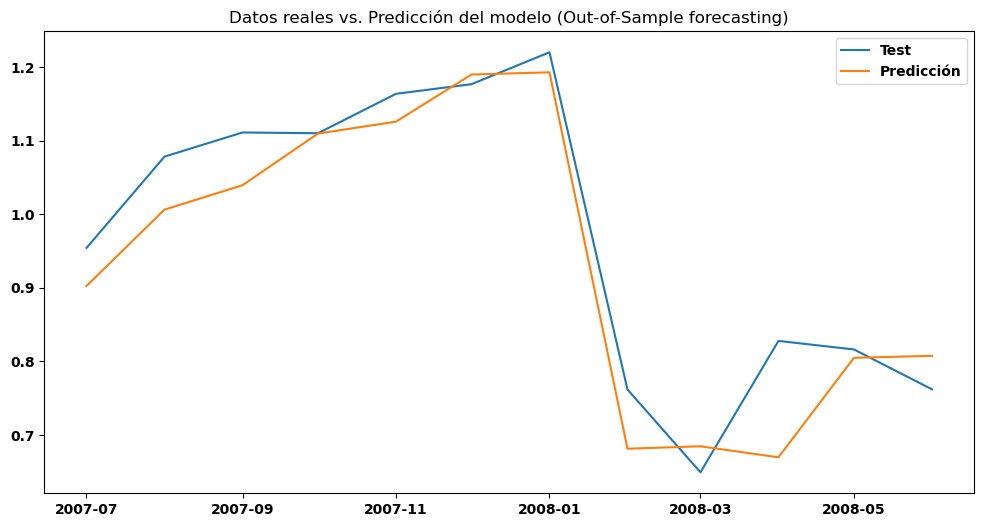

In [162]:
## Solución 28.3.6
plt.plot(df_test, label='Test')
plt.plot(y_pred_28_3_5, label='Predicción')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

#### Explicación 28.3.6
>

In [163]:
## Solución 28.3.7
X_train, y_train = modelo_28_3_5.create_train_X_y(df_train['venta_h02'])
fitted_values = modelo_28_3_5.regressor.predict(X_train)

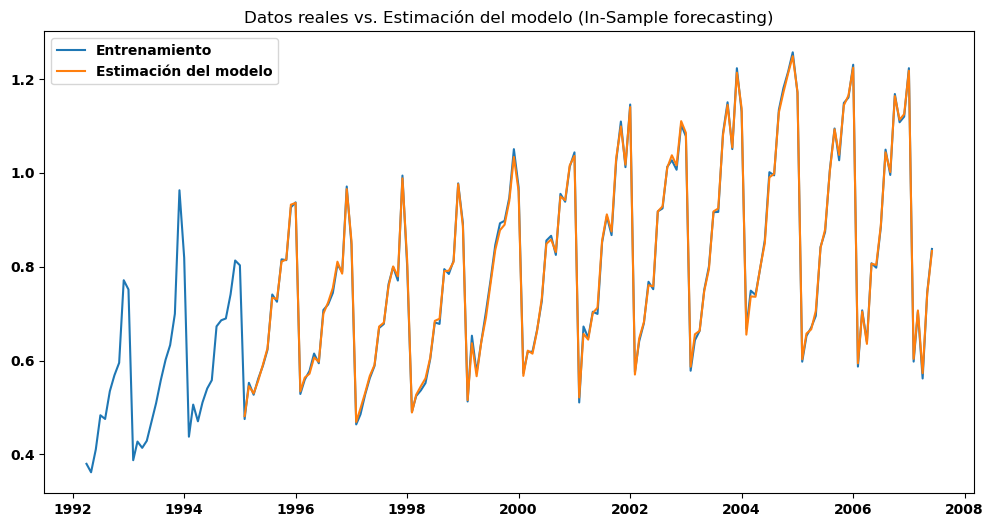

In [164]:
estim_cat = pd.Series(data=np.zeros(df_train.size), index=df_train.index, name='fitted')
start_index = len(df_train) - len(fitted_values)
estim_cat[:start_index] = np.nan
estim_cat[start_index:] = fitted_values


plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_cat, label='Estimación del modelo')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

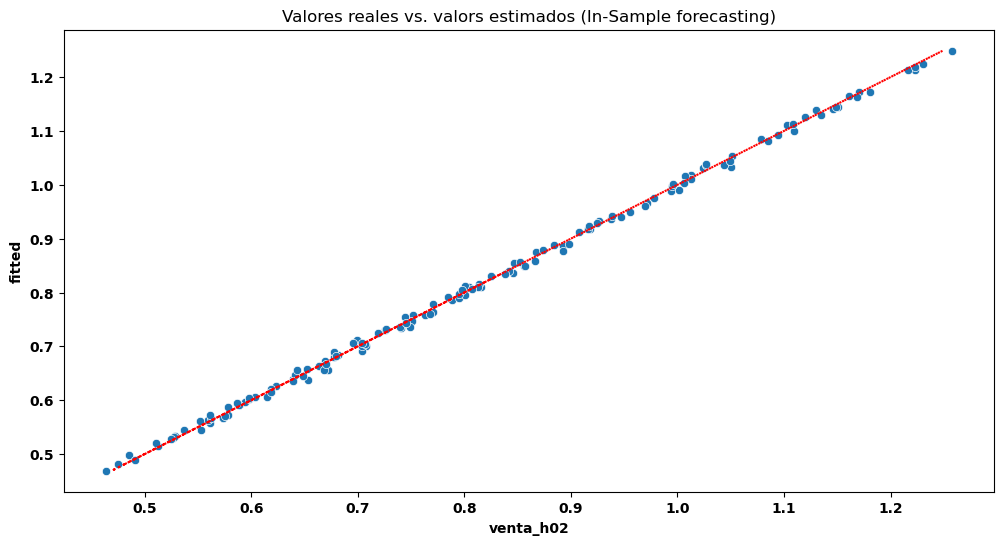

In [165]:
sns.scatterplot(x=df_train['venta_h02'], y=estim_cat)
plt.plot(estim_cat, estim_cat, color='r', linestyle=':')
plt.title("Valores reales vs. valors estimados (In-Sample forecasting)")
plt.show()

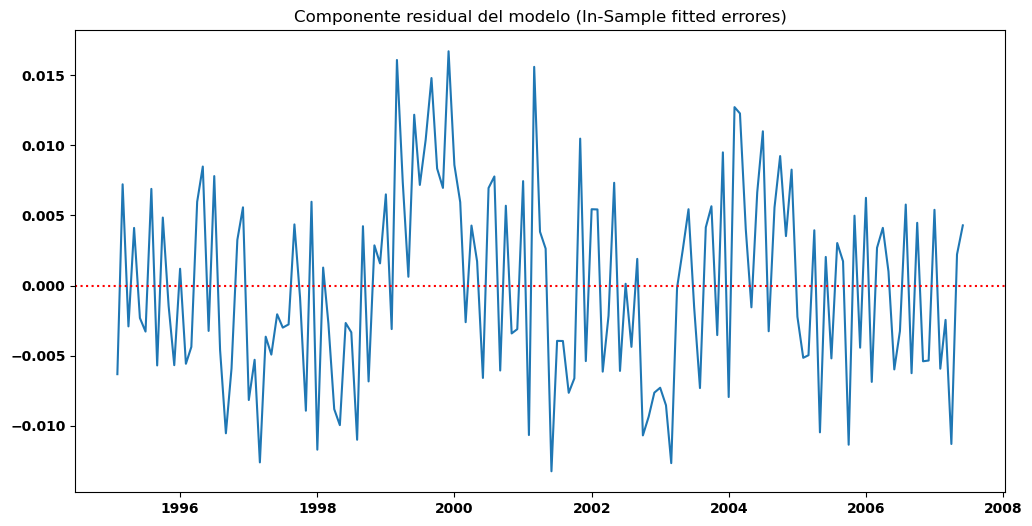

In [166]:
resid_cat = df_train['venta_h02']-estim_cat

plt.plot(resid_cat)
plt.title("Componente residual del modelo (In-Sample fitted errores)")
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

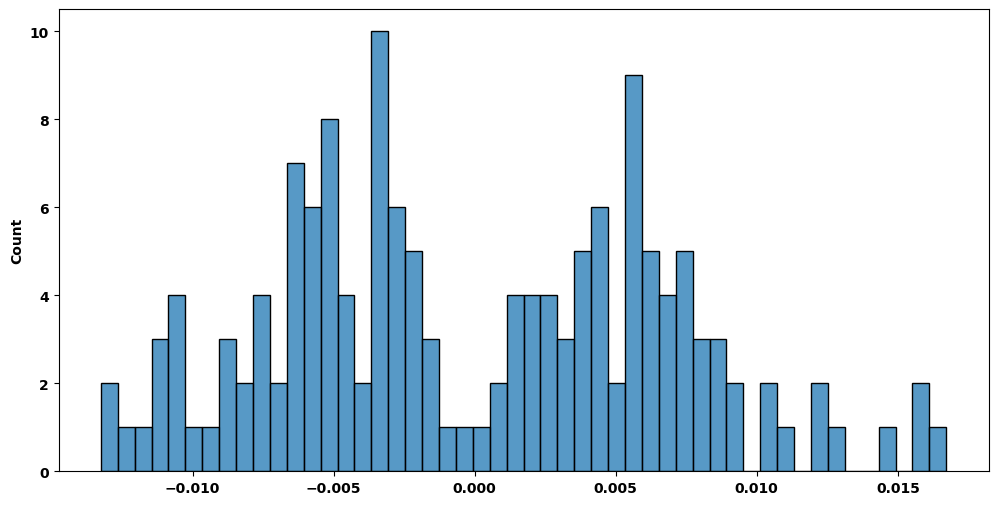

In [167]:
sns.histplot(data=resid_cat, bins=50)
plt.show()

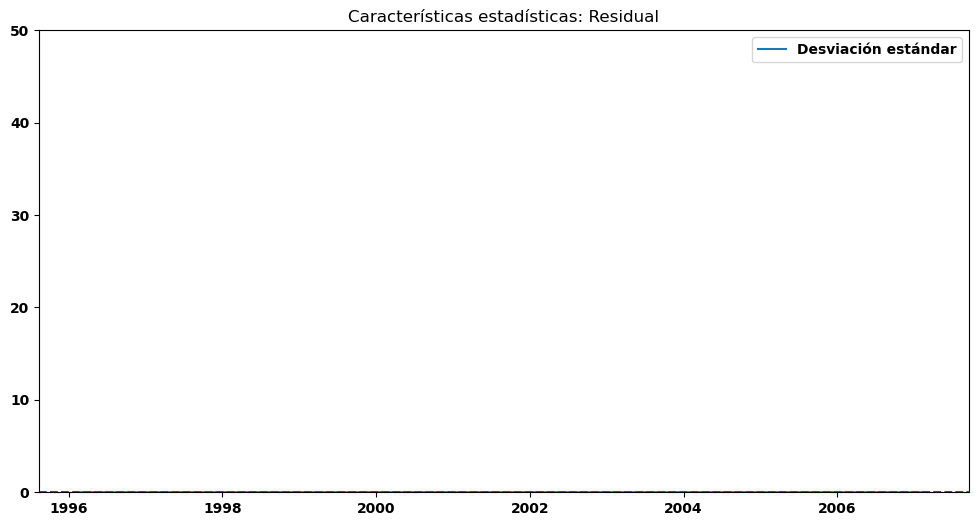

In [168]:
win_cat = 12
resid_cat_std = resid_cat.rolling(win_cat).std().iloc[win_cat-1::win_cat]
plt.plot(resid_cat_std, label='Desviación estándar')
plt.axhline(y=resid_cat.std(), color='r', linestyle='--')
plt.title("Características estadísticas: Residual")
plt.ylim(0,50)
plt.legend()
plt.show()

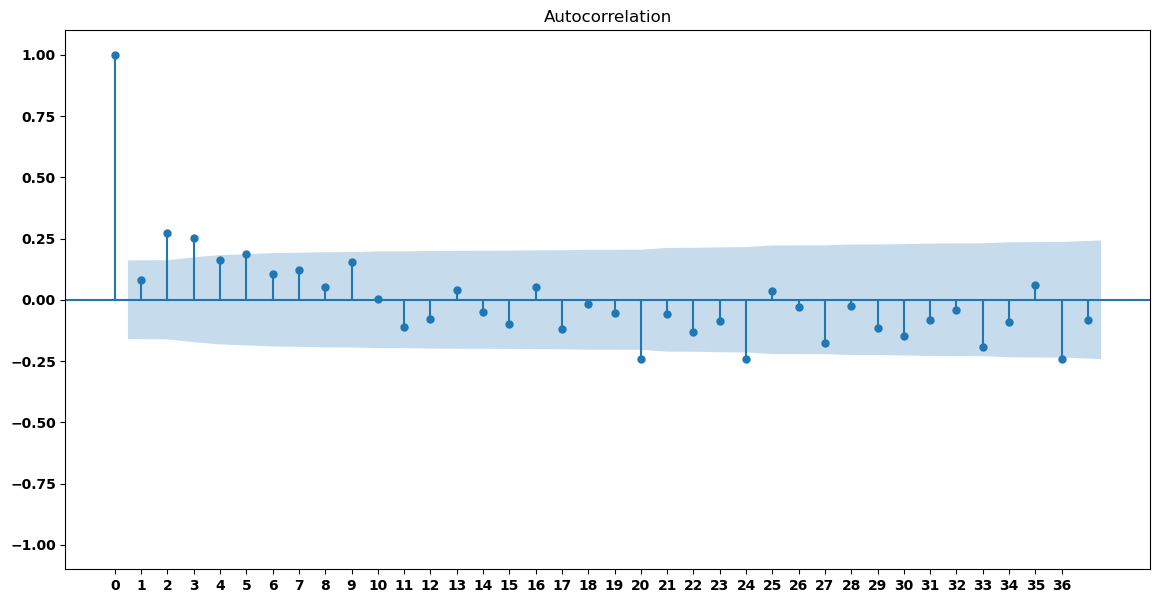

In [169]:
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(resid_cat.dropna(), lags=37)
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

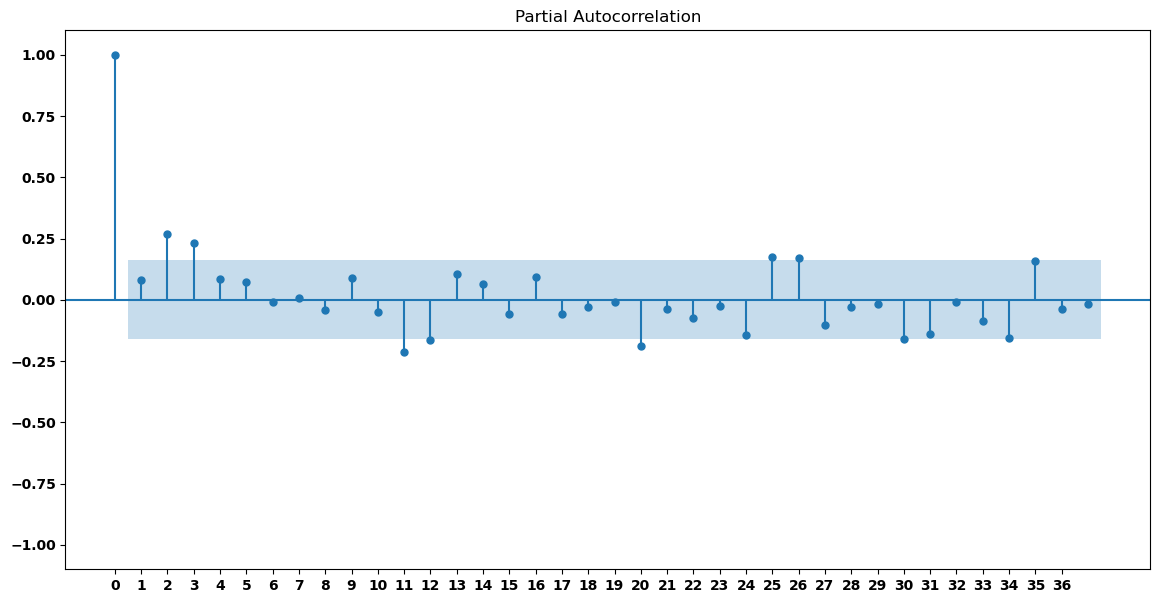

In [170]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(resid_cat.dropna(), lags=37, method='ywm')
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

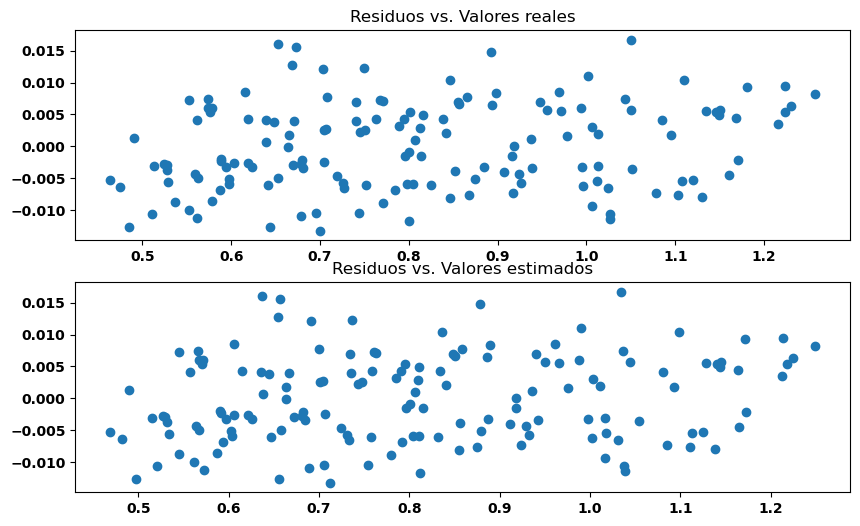

In [171]:
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0].scatter(df_train['venta_h02'], resid_cat)
ax[0].set_title('Residuos vs. Valores reales')
ax[1].scatter(estim_cat, resid_cat)
ax[1].set_title('Residuos vs. Valores estimados')
plt.show()

#### Explicación 28.3.7
>

In [172]:
## Solución 28.3.8
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train.index,
    y=df_train['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
x=pred_ar.index,
y=pred_ar,
name="Predicción (AR)",
mode="markers+lines"
))

fig.add_trace(go.Scatter(
    x=pred_sarima_auto.index,
    y=pred_sarima_auto,
    name="Predicción (SARIMA)",
    mode="markers+lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_cat.index,
    y=pred_cat,
    name="Predicción (CatBoostRegressor)",
    mode="markers+lines"
    ))

fig.update_layout(title="Ventas mensuales de corticosteroides (H02) en Australia",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Millones de dólares (A$)'
                  )

fig.show()

## Explicación 28.3.9
> 

---